<h1 align='center'> COMP2420/COMP6420 - Introduction to Data Management,<br/> Analysis and Security</h1>

<h1 align='center'> Assignment - 1 (2022)</h1>

-----

|**Maximum Marks**         |**100**
|--------------------------|--------
|  **Weight**              |  **15% of the Total Course Grade**
|  **Submission deadline** |  **TBA**
|  **Submission mode**     |  **Electronic, Using GitLab**
|  **Penalty**             |  **100% after the deadline**


## Learning Outcomes
The following learning outcomes apply to this piece:
- **LO3** - Demonstrate basic knowledge and understanding of descriptive and predictive data analysis methods, optimization and search, and knowledge representation.
- **LO4** - Formulate and extract descriptive and predictive statistics from data
- **LO5** - Analyse and interpret results from descriptive and predictive data analysis
- **LO6** - Apply their knowledge to a given problem domain and articulate potential data analysis problems


## Submission

You need to submit the following items:
- The notebook `Assignment_1_2022_uXXXXXXX.ipynb` (where uXXXXXXX is your uid) 
- A completed `statement-of-originality.md`, found in the root of the forked gitlab repo.

Submissions are performed by pushing to your forked GitLab assignment repository. For a refresher on forking and cloning repositories, please refer to `Lab 1`. Issues with your Git repo (with the exception of a CECS/ANU wide Gitlab failure) will not be considered as grounds for an extension. You will also need to add your details below. Any variation of this will result in a `zero mark`.

***** 

### Notes:

* It is strongly advised to read the whole assignment before attempting it and have at least a cursory glance at the dataset in order to gauge the requirements and understand what you need to do as a bigger picture.
* Backup your assignment to your Gitlab repo often. 
* Extra reading and research will be required. Make sure you include all references in your Statement of Originality. If this does not occur, at best marks will be deduced. Otherwise, academic misconduct processes will be followed.
* For answers requiring free form written text, use the designated cells denoted by `YOUR WRITTEN ANSWER HERE` -- double click on the cell to write inside them.
* For all coding questions please write your code after the comment `YOUR CODE HERE`. Remember to document your code using comments and doc strings as appropriate.
* In the process of testing your code, you can insert more cells or use print statements for debugging, but when submitting your file remember to remove these cells and calls respectively. You are welcome to add additional cells to the final submission, provided they add value to the overall piece.
* You will be marked on **correctness** and **readability** of your code, if your marker can't understand your code your marks may be deducted.
* Comment your code.
* Before submitting, restart the kernel in Jupyter Lab and re-run all cells before submitting your code. This will ensure the namespace has not kept any old variables, as these won't come across in submission and your code will not run. Without this, you could lose a significant number of marks.

*****

Credit: This assignment is based on previous work by Alex Niven in COMP2420/6420.  We thank Alex for allowing us to use his work and build on it.

### Enter your Student ID below:

******
## Context
You have been hired as a data scientist on a cybersecurity consulting team.  Your team has been tasked with advising government on the risk and impact of recent cybersecurity threats. 

### What is cybersecurity and why do we care?

“Cybersecurity is the practice of protecting critical systems and sensitive information from digital attacks” (IBM,2022).  Attackers normally target vulnerabilities in software and hardware systems in order to either bring down a system or steal sensitive or personal information.  Common cyber threats include malware, phishing, ransomware and distributed denial of service (DDoS).  You can read more about cyber threats on [the Australian Cyber Security Centre web page](https://www.cyber.gov.au/acsc/individuals-and-families/threats).  

Cyber-attacks can have significant negative impact to individuals, businesses and society at large.  They can lead to loss of privacy and money, cause disruption in key services and even cause death (some examples are given in [this article on impact of cyber-attacks here](https://www.securitymagazine.com/articles/96337-the-real-world-impacts-of-cyberattacks)).  Moreover, dealing with cyber-attacks is expensive.  IBM reports that the cost of a data breach in 2020 was USD $3.85 million globally (IBM, 2022).  


### How could you start your underlying investigation?

As a data scientist, you need to understand what problem you are trying to solve first.  In this particular case, you are trying to assess the risk and impact of recent cybersecurity threats.  In order to do so, you need to know what are those threats and have a method to carry out this assessment.  Where can you find this information?  There are various sources you could draw from.  To get started, your team has identified a few relevant systems for your investigation as described next.

#### The Common Vulnerability and Exposures (CVE) system
The CVE system is like a database that holds a number of the publicly known vulnerabilities that exist for software. It is the de-facto identifying system for publicly exposed vulnerabilities in systems, used by big tech companies such as  Apple, Microsoft, Google, Red Hat, etc. The CVE is a schema that allows the consistent storing of information regarding vulnerabilities.  More reading on the CVE is [here](https://www.cve.org/)

The CVE system was developed by [The MITRE Corporation](https://www.mitre.org/) almost 20 years ago, and is now the de-facto system for providing identifiers for vulnerabilities in various systems. 

CVE defines a vulnerability as, _"A weakness in the computational logic (e.g., code) found in software and hardware components that, when exploited, results in a negative impact to confidentiality, integrity, or availability"._ A CVE can affect multiple products and multiple software versions of a product.

However, the CVE system alone is incomplete, and extended by organisations such as the **National Vulnerability Database (NVD)**.

#### The Common Weakness Enumeration (CWE) system
There is another related system to CVE called the [Common Weakness Enumeration (CWE)](https://cwe.mitre.org), also developed by MITRE. CWE categorises types of software vulnerabilities whereas CVE is just a list of currently known vulnerabilities regarding specific systems and products (Camacho, 2021) .  Each CWE identifier is related to a specific type of weakness which will have its own unique characteristics, rather than specific instances of vulnerabilities within products or systems. 
The CWE's are broadly viewed in three categories:
- [by Software Development](https://cwe.mitre.org/data/definitions/699.html)
- [by Hardware Design](https://cwe.mitre.org/data/definitions/1194.html)
- [by Research Concepts](https://cwe.mitre.org/data/definitions/1000.html)

#### The Common Vulnerability Scoring System (CVSS)
CVSS is the de-facto scoring system for determining the impacts of vulnerabilities in the CVE system.  It is developed and maintained by the [National Vulnerability Database (NVD)](https://nvd.nist.gov).  All vulnerabilities in the NVD have been assigned a CVE identifier. Developed by the Forum of Incident Response and Security Teams (FIRST), the CVSS system is now in its 3<sup>rd</sup> major iteration (version 3).

### The Assignment Dataset: based on the Common Vulnerability Scoring System (CVSS) data
The assignment dataset is derived from a subset of the Common Vulnerability Scoring System (CVSS) data for the year 2020 available from the [National Vulnerability Database (NVD)](https://nvd.nist.gov). 

Note that while over 1000 CWE identifiers exist, only a small subset will be present within our dataset. This is due to the NVD using their own subset of them, which can be found on the [NVD website](https://nvd.nist.gov/vuln/categories).

We have further filtered the 2020 CVSS dataset by retaining only the records that relate to the Software Development viewpoint. In our dataset, each unique CVE is mapped to one or more CWE's and is given a vulnerability score that is assigned by the CVSS scoring system. 



### What should I do next? 
Good question! Now that you have some background, you can work with the given CVE-based dataset as a starting point to explore a number of questions to help in your investigation.  You can draw on your python, data analysis and basic machine learning skills to work towards the goal that your team has been tasked with.


*****

References

IBM. 2022. What is Cybersecurity? | IBM. [online] Available at: [https://www.ibm.com/au-en/topics/cybersecurity](https://www.ibm.com/au-en/topics/cybersecurity). (Accessed 3 March 2022).

Camacho, R. 2021.  All about CWE: Common Weakness Enumeration. Parasoft. [https://www.parasoft.com/blog/what-is-cwe/#:~:text=In%20short%3A%20the%20difference%20between,regarding%20specific%20systems%20and%20products.](https://www.parasoft.com/blog/what-is-cwe/#:~:text=In%20short%3A%20the%20difference%20between,regarding%20specific%20systems%20and%20products.)

**********
## Data Description
We have a sizable dataset to give you (in the form of 2 files), so it is wise to consider your code in terms of complexity to ensure it doesn't take 30 minutes to run a single line. 

The below tables provide an outline of the data, broken down into the columns of the dataset features. 

###  The CVSS data table
| Column Name    | Description    |
| :------------- | :------------- |
| cve_id         | The CVE identifier for the vulnerability |
| assigner       | The entity who assigned the CVE |
| description     | A description of the vulnerability |
| cwe_ids         | The CWE identifiers of the vulnerability. Note that there can be multiple cwe_id's attached to one cve_id |
| refs            | url links to the initial postings of the vulnerability |
| ref_names       | other information which provide more reference about the CVE |
| ref_sources     | other information which provide more reference about the CVE |
| ref_tags        | other information which provide more reference about the CVE |
| v3_attackVector | CVSSv3 field, identifier for how the vulnerability would be used in an attack |
| v3_attackComplexity | CVSSv3 field, identifier for the difficulty of performing an attack using the vulnerability |
| v3_privilegesRequired | CVSSv3 field, an identifier for the privileges required in the system to use the vulnerability successfully |
| v3_userInteraction | CVSSv3 field, an identifier for whether a user needs to actively interact for the vulnerability to be exploited or not |
| v3_scope | CVSSv3 field, an identifier for whether the scope of an item changes when using the vulnerability. e.g: whether a regular user becomes a superuser. |
| v3_confidentialityImpact | CVSSv3 field, identifier for the impact upon the confidentiality of information in the product/service after using the vulnerability |
| v3_integrityImpact | CVSSv3 field, identifier for the impact upon the integrity of information in the product/service after using the vulnerability |
| v3_availabilityImpact | CVSSv3, field, identifier for the impact upon the availability of information in the product/service after using the vulnerability |
| v3_exploitabilityScore | The Exploitability Score is a sub score of the CVSS Base Score |
| v3_impactScore | The Impact Score is a sub score of the CVSS Base Score |
| v3_baseScore | The CVSS score (out of 10) given to the vulnerability based on CVSS v3.1 |
| v3_baseSeverity | A textual representation of the numeric Base Score|

We only use the Base Metrics out of the [CVSS Metrics](https://www.first.org/cvss/v3-1/media/MetricGroups.svg). While there are additional metrics that can be applied, most are variants. Therefore, we will use the base metrics. The column names starting with 'v3_' are CVSS v3.1 metrics. Refer to the specification document  [CVSSv3.1 Guide](https://www.first.org/cvss/v3.1/specification-document) for more information on the metrics. 

**Note:** While this dataset has 20 columns, the data in the last four columns have been purposely omitted (see Question 2 of the Assignment).

###  The CVE to Configurations mapping table
| Column Name    | Description    |
| :------------- | :------------- |
| cve_id         | The CVE identifier for the vulnerability |
| vendor         | The name of the vendor who produces the product |
| product_name   | The name of the affected product       |
| version        | List of the affected product versions |

Recall that a CVE can affect multiple products and multiple software versions of a product.

*******************
## Package Imports

In [22]:
# Common Imports
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
plt.style.use('seaborn')
# %matplotlib inline

In [23]:
# Import additional modules here as required
# It is unlikely that you would need any additional modules, however we had added space here just in case you feel 
#     extras are required. Note that justification as to WHY you are using them MUST be provided.
#
# Note that only modules in the standard Anaconda distribution are allowed. If you need to install it manually, it is not an accepted package.
#
#
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import timeit
import math
from math import sqrt
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from pylab import rcParams
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold # Scikit-learn K-Folds cross-validator
from sklearn.model_selection import cross_val_score # evaluating cross-validator performance
k_fold = KFold(n_splits=10, shuffle=True, random_state=0) # KFold configuration      
from sklearn.pipeline import Pipeline
# explicitly require this experimental feature
from sklearn.experimental import enable_halving_search_cv # noqa
# now you can import normally from model_selection
from sklearn.model_selection import HalvingGridSearchCV  # GridSearch

****
## Q1: Loading and Processing the Data
Your first step in any data analysis and visualisation task is to load the data and make it usable. Note that the data consists of various types (Categorical, Numerical, Text, etc.). Also the dataset may not be perfect; it may contain missing data or invalid values at some places. It would be wise to perform some pre-processing to make the data easier to work with. 

#### (Q1.a) You need to load the following two files available in the './data' folder into a suitable data structure:
- cvss_dataset.csv
- cve_configurations_mapping.csv

Please write out the code you would use to load those files and the code you would use to perform some pre-processing. (2 marks)

#### (Q1.b)You also need to briefly outline your steps and justify your decisions. 
This is an open-ended question, and marks will be awarded for logical processing of data. (3 marks)

**HINTS** -
* You might need to split some columns into two or combine two columns into one to make them more useful from an analysis point-of-view.
* You might need to rename some columns.
* It may be worth recoding the CVSS data to the numerical values required for Q2.
* You are welcome to drop unwanted columns (but don't remove or impute values for the last four columns as you will be asked to recreate these columns in Q2)
* If you wish, you may combine the data available in both files.

<span style= 'float: right;'><b>[5 marks]</b></span>

In [6]:
%%time
# YOUR CODE HERE (Q1.a)
# Loading the two files
fileName1 = "./data/cve_configurations_mapping.csv"
fileName2 = "./data/cvss_dataset.csv"

# Create dataframe of csv files
try:
    cve_df = pd.read_csv(fileName1)
except OSError:
    print("Could not read file:",fileName1)
except FileNotFoundError:
    print(f"file {fileName1} not found")

try:
    cvss_df = pd.read_csv(fileName2)
except OSError:
    print("Could not read file:",fileName2)
except FileNotFoundError:
    print(f"file {fileName2} not found")

# Joining the two dataframes into one
data_df = pd.merge(cve_df, cvss_df, on="cve_id")

# check for null
print("These columns have Nan: ", data_df.columns[data_df.isna().any()].tolist())

# Replacing categorical column's nan with mode 
# (https://www.geeksforgeeks.org/pandas-filling-nan-in-categorical-data/)
cols = ['version', 'ref_names', 'ref_sources']
data_df[cols] = data_df[cols].fillna(data_df.mode().iloc[0])

# Converting categorical data to numerical
# Create a dict of the categorical values to be replaced by the numeric values
# The values are taken from the CVSSv3.1 specification document
numeric_replace = {"v3_attackVector": {"NETWORK":0.85, "ADJACENT_NETWORK":0.62, "LOCAL":0.55, "PHYSICAL":0.2},
                   "v3_attackComplexity": {"LOW":0.77, "HIGH":0.44},
                   "v3_scope": {"UNCHANGED":0.0, "CHANGED":1.0},
                   "v3_userInteraction": {"NONE":0.85, "REQUIRED":0.62},
                   "v3_confidentialityImpact": {"HIGH":0.56, "LOW":0.22, "NONE":0},
                   "v3_integrityImpact": {"HIGH":0.56, "LOW":0.22, "NONE":0},
                   "v3_availabilityImpact": {"HIGH":0.56, "LOW":0.22, "NONE":0},
                   "v3_privilegesRequired": {"NONE":0.85, "LOW":0.0, "HIGH":1.0}}

# Replace the values
data_df = data_df.replace(numeric_replace)

# use apply and lambda for better efficiency
# Low = 0, High = 1
def encode_privileges(v3_scope, v3_privilegesRequired):
    '''
    This function encodes categories in privileges required
    input: float, object
    output: float
    '''
    if v3_scope == 0.0 and v3_privilegesRequired == 0.0:
        return float(0.62)
    elif v3_scope == 1.0 and v3_privilegesRequired == 0.0:
        return float(0.68)
    elif v3_scope == 0.0 and v3_privilegesRequired == 1.0:
        return float(0.27)
    elif v3_scope == 1.0 and v3_privilegesRequired == 1.0:
        return float(0.5)
    
data_df['v3_privilegesRequired'] = data_df.apply(lambda row: encode_privileges(row['v3_scope'], row['v3_privilegesRequired']), axis=1)
# The nan values would be the None label which is 0.85 numerically
data_df['v3_privilegesRequired'] = data_df['v3_privilegesRequired'].fillna(0.85)


# check whether the dtype have been converted to numeric
# print("the data types in the dataset are as follows:\n", data_df.dtypes, "\n")

# Check if there are any more null values except the last four.
print("After pre-processing, these columns have Nan: ", data_df.columns[data_df.isna().any()].tolist())

# Check for duplicate rows. Drop any duplicates
print("There are",data_df.duplicated().sum(),"duplicated rows")

# data_df.to_csv('joined.csv')

data_df.describe()

These columns have Nan:  ['version', 'ref_names', 'ref_sources', 'v3_exploitabilityScore', 'v3_impactScore', 'v3_baseScore', 'v3_baseSeverity']
After pre-processing, these columns have Nan:  ['v3_exploitabilityScore', 'v3_impactScore', 'v3_baseScore', 'v3_baseSeverity']
There are 0 duplicated rows
Wall time: 1.01 s


,v3_attackVector,v3_attackComplexity,v3_privilegesRequired,v3_userInteraction,v3_scope,v3_confidentialityImpact,v3_integrityImpact,v3_availabilityImpact,v3_exploitabilityScore,v3_impactScore,v3_baseScore,v3_baseSeverity
count,52328.000000,52328.000000,52328.000000,52328.000000,52328.000000,52328.000000,52328.000000,52328.000000,0.0,0.0,0.0,0.0
mean,0.757346,0.753711,0.758145,0.814200,0.105832,0.440750,0.326529,0.465373,NaN,NaN,NaN,NaN
std,0.146710,0.071486,0.152558,0.083382,0.307626,0.213515,0.264720,0.207945,NaN,NaN,NaN,NaN
min,0.200000,0.440000,0.270000,0.620000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,0.550000,0.770000,0.620000,0.850000,0.000000,0.560000,0.000000,0.560000,NaN,NaN,NaN,NaN
50%,0.850000,0.770000,0.850000,0.850000,0.000000,0.560000,0.560000,0.560000,NaN,NaN,NaN,NaN
75%,0.850000,0.770000,0.850000,0.850000,0.000000,0.560000,0.560000,0.560000,NaN,NaN,NaN,NaN
max,0.850000,0.770000,0.850000,0.850000,1.000000,0.560000,0.560000,0.560000,NaN,NaN,NaN,NaN


******
## Q2: Recreating Missing Data
While the dataset that has been provided is thorough, you may have already noticed that the last four columns (i.e. 'v3_exploitabilityScore', 'v3_impactScore', 'v3_baseScore', 'v3_baseSeverity) are empty. These are related to the CVSSv3.1 base score and are well documented in the specification documents  [CVSSv3.1 Guide](https://www.first.org/cvss/v3.1/specification-document) and [CVSS calculator](https://www.first.org/cvss/calculator/3.1).

Your task is as follows:

#### (Q2.a) Implement a **CVSSv3.1** Base Score calculator and recalculate values for the last four columns for each applicable entry in the dataset. (5 marks) 

#### (Q2.b) Explain how you performed the calculations. Provide the [Equations](https://www.first.org/cvss/v3-1/media/EquationsDiagram.svg) that you used. (5 marks)

<span style= 'float: right;'><b>[10 marks]</b></span>

<br><br>
**Additional Questions for COMP6420 students: [worth extra 5 marks]** 

#### (Q2.c) Please explain how would you validate that your calculations are correct? (3 marks)

#### (Q2.d) Provide some evidence that you have validated your calculations. (2 marks)

In [7]:
# Helper Functions
def Roundup (i):
    '''
    This function roundsup numbers. This implementation of the function
    was provided in the CVSSv3.1 documentation. The only adjustment made to
    the function was replacing round_to_nearest_integer with python's 
    in-built round().
    '''
    int_input = round(i * 100000)
    if (int_input % 10000) == 0:
        return int_input / 100000.0
    else:
        return (math.floor(int_input / 10000) + 1) / 10.0


In [8]:
%%time
# YOUR CODE HERE
# Create a function and apply that function to the dataframe to calculate the missing values

# turn off SettingWithCopyWarning
pd.options.mode.chained_assignment = None # defualt='warn'

# approach: create a dataframe of only v3_confidentialityImpact, v3_integrityImpact
# and v3_availabilityImpact. perform calculation on the dataframe. create a new column
# called ISS and fill the column with the calculated values using numpy vectorization.
def ISS_score(v3_confidentialityImpact, v3_integrityImpact, v3_availabilityImpact):
    '''
    This function takes in confidentialty, integrity and availability impacts
    to calculate a ISS score.
    input: float, float, float
    output: float
    '''
    ISS = 1 - ((1 - v3_confidentialityImpact) * 
               (1 - v3_integrityImpact) * 
               (1 - v3_availabilityImpact))
    
    return ISS
# create ISS coulm and fill with ISS scores
data_df['ISS'] = np.vectorize(ISS_score)(data_df['v3_confidentialityImpact'], 
                                         data_df['v3_integrityImpact'], 
                                         data_df['v3_availabilityImpact'])

# Fill in the missing columns
# calculate Impact score
def impactScore(ISS, v3_scope):
    '''
    This function calculates the impact score using the ISS score and scope
    input: float, float
    output: float
    '''
    if v3_scope == 0:
        impact_score = 6.42 * ISS
    elif v3_scope == 1:
        impact_score = 7.52 * (ISS - 0.029) - 3.25 * (ISS - 0.02)**15
    return impact_score

# replace nan values in impact score column with calculated values
data_df['v3_impactScore'] = np.vectorize(impactScore)(data_df['ISS'],
                                                 data_df['v3_scope'])
# calculate exploitability score
def exploitScore(v3_attackVector, v3_attackComplexity, v3_privilegesRequired, v3_userInteraction):
    '''
    This function calculates the exploitability score using the 
    attackVector, attackComplexity, privilegesRequired, UserInteraction
    input: float, float, float, float
    output: float
    '''
    exp_score = 8.22 * v3_attackVector * v3_attackComplexity * v3_privilegesRequired * v3_userInteraction
    return exp_score

# replace nan values in exploitability score with calculated values
data_df['v3_exploitabilityScore'] = np.vectorize(exploitScore)(data_df['v3_attackVector'],
                                                           data_df['v3_attackComplexity'],
                                                           data_df['v3_privilegesRequired'],
                                                           data_df['v3_userInteraction'])
# calculate Base score
def baseScore(v3_impactScore, v3_exploitabilityScore, v3_scope):
    '''
    This function calculates the base score through the help of roundup function,
    The parameters are the impact, exploitability and scope.
    input: float, float, float
    output: float
    '''
    if v3_impactScore <= 0:
        return 0
    elif v3_scope == 0:
        return Roundup(min((v3_impactScore + v3_exploitabilityScore), 10))
    elif v3_scope == 1:
        return Roundup(min(1.08 * (v3_impactScore + v3_exploitabilityScore), 10))

# replace nan values in exploitability score with calculated values
data_df['v3_baseScore'] = np.vectorize(baseScore)(data_df['v3_impactScore'],
                                             data_df['v3_exploitabilityScore'],
                                             data_df['v3_scope'])

# calculate base severity
# 1 is lowest, 5 is highest
def base_severity_rating(v3_baseScore):
    '''
    This function assigns a severity rating depending on the base score
    input: float
    output: string
    '''
    pass
    if v3_baseScore == 0:
        return 1
    elif 0.1 <= v3_baseScore <= 3.9:
        return 2
    elif 4.0 <= v3_baseScore <= 6.9:
        return 3
    elif 7.0 <= v3_baseScore <= 8.9:
        return 4
    elif 9.0 <= v3_baseScore <= 10.0:
        return 5
      
# replace nan values in base severity
data_df['v3_baseSeverity'] = np.vectorize(base_severity_rating)(data_df['v3_baseScore'])

# create a csv
# data_df.to_csv('filled_df.csv')

# Check if there are any more null values.
print("After filling missing values, these columns have Nan: ", data_df.columns[data_df.isna().any()].tolist())


After filling missing values, these columns have Nan:  []
Wall time: 132 ms


![alt text](CVSS_equations.png "CVSS_equations")

In [28]:
data_df.describe()

,v3_attackVector,v3_attackComplexity,v3_privilegesRequired,v3_userInteraction,v3_scope,v3_confidentialityImpact,v3_integrityImpact,v3_availabilityImpact,v3_exploitabilityScore,v3_impactScore,v3_baseScore,v3_baseSeverity,ISS
count,52328.000000,52328.000000,52328.000000,52328.000000,52328.000000,52328.000000,52328.000000,52328.000000,52328.000000,52328.000000,52328.000000,52328.000000,52328.000000
mean,0.757346,0.753711,0.758145,0.814200,0.105832,0.440750,0.326529,0.465373,2.968301,4.977942,8.043218,4.177018,0.771267
std,0.146710,0.071486,0.152558,0.083382,0.307626,0.213515,0.264720,0.207945,1.067700,1.180308,1.534794,0.764053,0.189198
min,0.200000,0.440000,0.270000,0.620000,0.000000,0.000000,0.000000,0.000000,0.290519,1.412400,2.200000,2.000000,0.220000
25%,0.550000,0.770000,0.620000,0.850000,0.000000,0.560000,0.000000,0.560000,1.834577,3.595200,7.500000,4.000000,0.560000
50%,0.850000,0.770000,0.850000,0.850000,0.000000,0.560000,0.560000,0.560000,3.887043,5.873119,7.800000,4.000000,0.914816
75%,0.850000,0.770000,0.850000,0.850000,0.000000,0.560000,0.560000,0.560000,3.887043,5.873119,9.800000,5.000000,0.914816
max,0.850000,0.770000,0.850000,0.850000,1.000000,0.560000,0.560000,0.560000,3.887043,6.047730,10.000000,5.000000,0.914816


******
## Q3: Data Exploration
In this question you are asked to explore the given data and present information in a suitable manner. You are required to present the information both visually (using plots) and using descriptive statistics. 

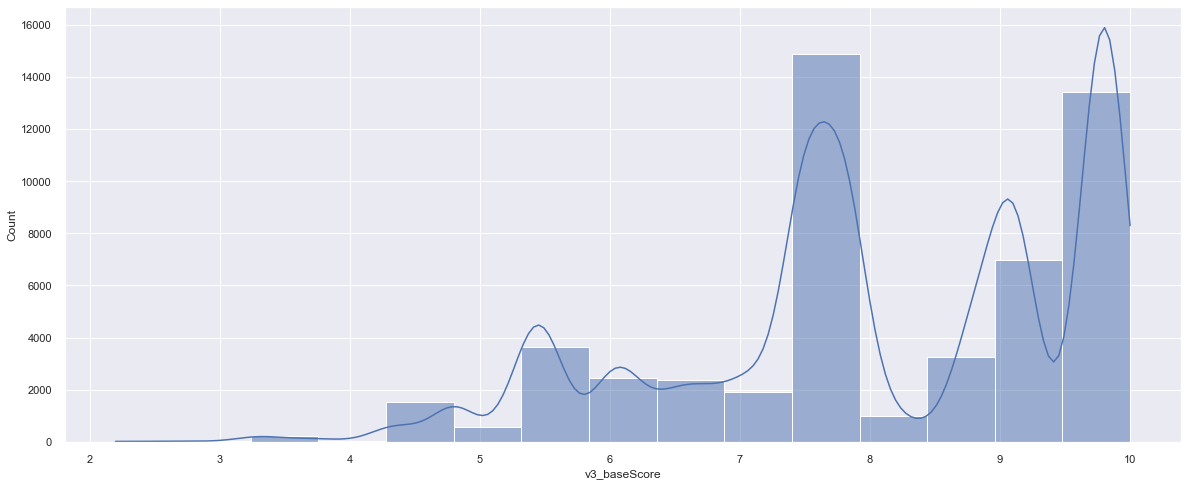

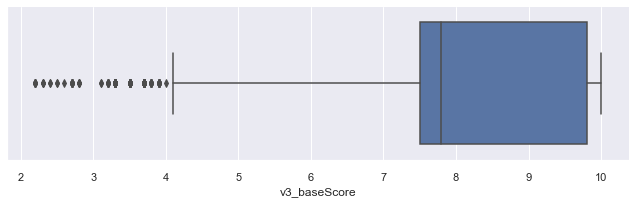

The histogram and box plot shows that most base scores are between 7 to 8 and 9 to 10 which indicates in 2020 there were high severity cases
Wall time: 646 ms


In [9]:
%%time
# Base score distribution.
sns.set(rc = {'figure.figsize':(20,8)})
sns.histplot(data_df['v3_baseScore'], bins=15, kde=True)
plt.show()

# Boxplot representation
sns.catplot(x='v3_baseScore', kind='box', data=data_df, height=3, aspect=3, orient="h")
plt.show()

print("The histogram and box plot shows that most base scores are between 7 to 8 and 9 to 10 which indicates in 2020 there were high severity cases")



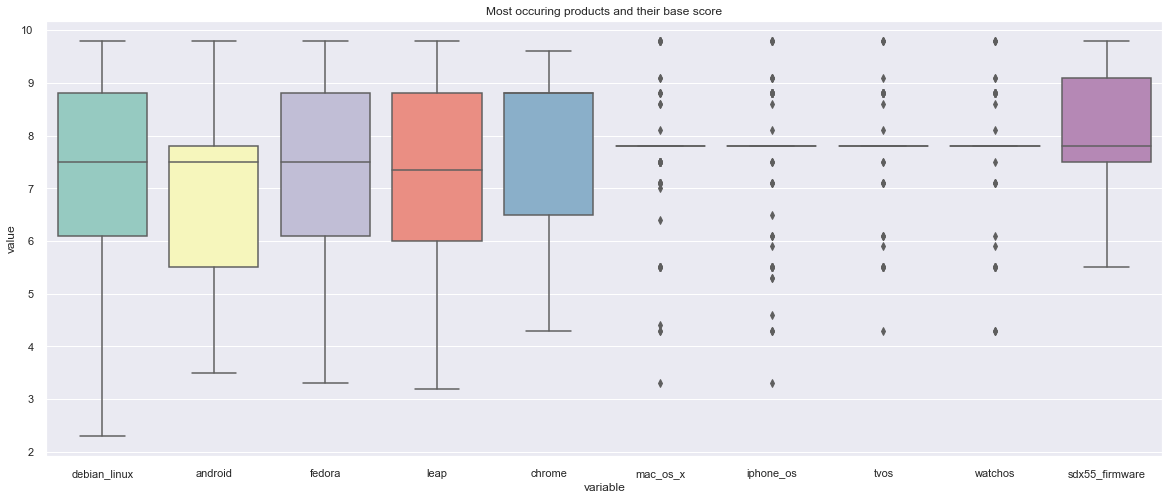

Most products had a high mean base score
Wall time: 266 ms


In [10]:
%%time
# # Boxplot categorical values (product_name) Most frequent products and their base scores

data_product = {'product_name': data_df['product_name'],
               'v3_baseScore': data_df['v3_baseScore']}
df_product = pd.DataFrame(data_product)

top_10_products = df_product['product_name'].value_counts()[:10].index.tolist()
# ['debian_linux', 'android', 'fedora', 'leap', 'chrome', 'mac_os_x', 'iphone_os', 'tvos', 'watchos', 'sdx55_firmware']

product_dict = {'debian_linux': df_product.loc[df_product['product_name']=='debian_linux', 'v3_baseScore'],
                'android': df_product.loc[df_product['product_name']=='android', 'v3_baseScore'],
                'fedora': df_product.loc[df_product['product_name']=='fedora', 'v3_baseScore'],
                'leap': df_product.loc[df_product['product_name']=='leap', 'v3_baseScore'],
                'chrome': df_product.loc[df_product['product_name']=='chrome', 'v3_baseScore'],
                'mac_os_x': df_product.loc[df_product['product_name']=='mac_os_x', 'v3_baseScore'],
                'iphone_os': df_product.loc[df_product['product_name']=='iphone_os', 'v3_baseScore'],
                'tvos': df_product.loc[df_product['product_name']=='tvos', 'v3_baseScore'],
                'watchos': df_product.loc[df_product['product_name']=='watchos', 'v3_baseScore'],
                'sdx55_firmware': df_product.loc[df_product['product_name']=='sdx55_firmware', 'v3_baseScore']}

df_product = pd.DataFrame(data = product_dict)
# fill missing values
df_product.fillna(df_product.mean())

# Plotting
sns.boxplot(x='variable', y='value', data=pd.melt(df_product), palette="Set3")
plt.title("Most occuring products and their base score")
plt.show()
print("Most products had a high mean base score")


#### (Q3.a)
There is an unverified claim made that most of the CVEs reported in 2020 were of MEDIUM Severity.  How would you check that claim and present the conclusion? Please explain your approach and implement it in code.
<span style= 'float: right;'><b>[5 marks]</b></span>

Most of the CVE's reported in 2020 had a severity of 4 which is ['HIGH']


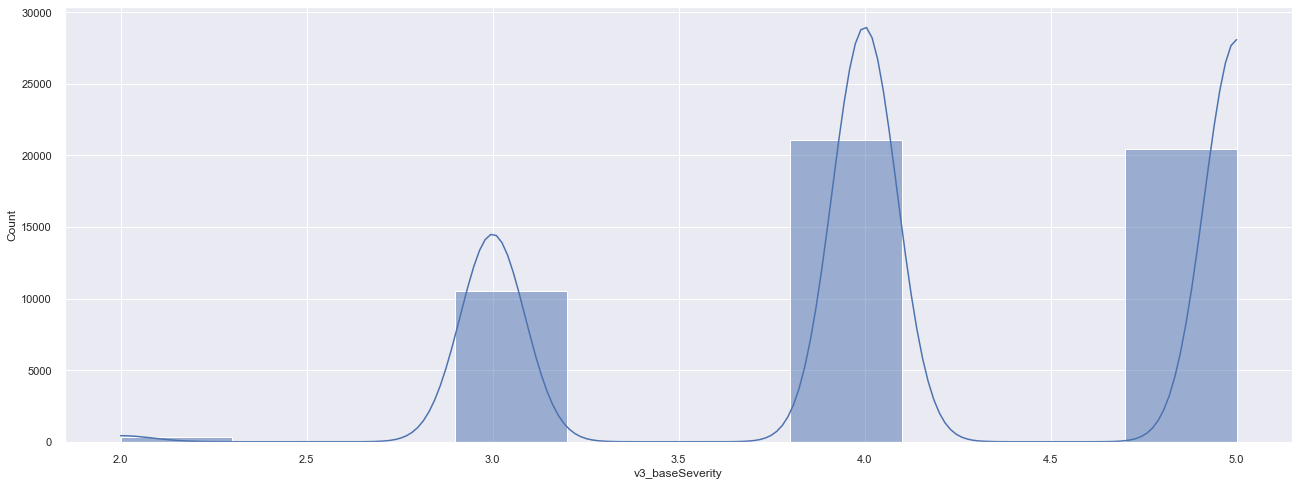

As shown is the graph, 4 (HIGH) has the highest count
Wall time: 319 ms


In [11]:
%%time
# YOUR CODE HERE
# 3 is medium
rating_dict = {'CRITICAL': 5, 'HIGH': 4, 'MEDIUM': 3, 'LOW': 2, 'NONE': 1}
mode_severity = data_df['v3_baseSeverity'].mode().tolist()[0]
rating = [k for k, v in rating_dict.items() if v==mode_severity]
print(f"Most of the CVE's reported in 2020 had a severity of {mode_severity} which is {rating}")

# Plot a histogram to show the mode which would be the middle bar
rcParams['figure.figsize'] = 22, 8
sns.histplot(data=data_df, x='v3_baseSeverity', kde=True, bins=10)
plt.show()
print("As shown is the graph, 4 (HIGH) has the highest count")



#### (Q3.b)
What are the top 5 CWEs that are mentioned in the data? Why did you present this information in the way you chose?
<span style= 'float: right;'><b>[5 marks]</b></span>

In [12]:
%%time
# YOUR CODE HERE
# top 5 occuring CWES
top_5_cwe = data_df['cwe_ids'].value_counts()[:5].index.tolist()
print(f'The top 5 most occurring cwe ids are: \033[4m \033[1m{top_5_cwe}\033[0m \033[0m')

The top 5 most occurring cwe ids are:  ['CWE-125', 'CWE-787', 'CWE-120', 'CWE-79', 'CWE-190'] 
Wall time: 4.06 ms


In [13]:
%%time
# top 5 CWES by base score
data_df_copy = data_df.copy()
data_df_copy = data_df_copy.sort_values(by='v3_baseScore', ascending=False)
data_df_copy = data_df_copy['cwe_ids']
top_5_cwe_basescore = data_df_copy.unique()[:5]
print(F"The top 5 cwes by base score in-order is:\033[4m \033[1m{top_5_cwe_basescore}\033[0m \033[0m")

The top 5 cwes by base score in-order is: ['CWE-306' 'CWE-787' 'CWE-78' 'CWE-434' 'CWE-502'] 
Wall time: 20 ms


#### (Q3.c)
Google products are commonly used.  Your team wants to know how cyber-threats are affecting google users.  Find all the CVEs associated with the Vendor google and present the distribution of CVSS Base Scores for google in a suitable manner.  Please also explain your steps.
<span style= 'float: right;'><b>[5 marks]</b></span>

In [14]:
# YOUR CODE HERE
# find all cves associated with google
google_cves = data_df[data_df['vendor']=='google']
google_cves = google_cves['cve_id']
pd.set_option('display.max_rows', None)
google_cves.head()

0    CVE-2020-0002
1    CVE-2020-0003
2    CVE-2020-0005
3    CVE-2020-0006
4    CVE-2020-0007
Name: cve_id, dtype: object

The mean base score for google is:  7.268237347294989 , indicating high cyber threats
Most to least occuring basescore for google:  [8.8, 7.8, 6.5, 5.5, 9.8, 4.4, 7.5, 6.7, 4.3, 5.3, 9.1, 9.6, 6.1, 3.3, 6.4, 6.3, 5.9, 7.0, 4.7, 4.5, 8.1, 6.8, 4.9, 4.8, 7.3, 3.5, 7.6, 4.6, 5.0, 4.0, 8.6, 9.0, 9.9, 7.1, 8.0]
From the most to least occuring list, it's seen that 8.8 and 9.8 occurs a lot which is represented in the histogram
Wall time: 46 ms


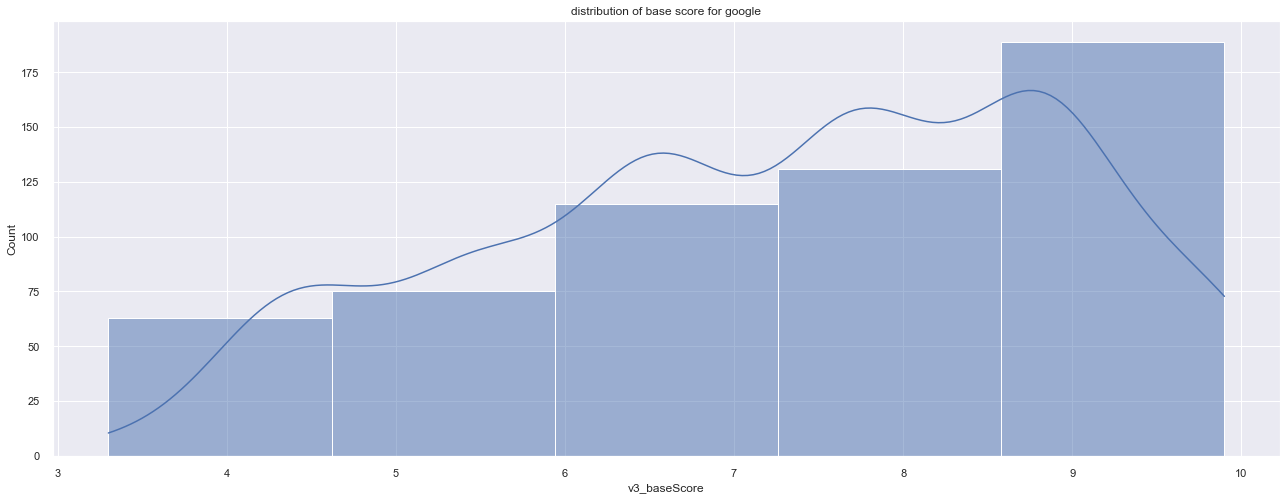

In [15]:
%%time
# show distribution of base score for google
google_baseScore = data_df.loc[data_df['vendor']=='google', 'v3_baseScore']
pd.reset_option('display.max_rows', None)
print(f"The mean base score for google is: \033[4m \033[1m{google_baseScore.mean()}\033[0m \033[0m, indicating high cyber threats")
print("Most to least occuring basescore for google: ",google_baseScore.value_counts().index.tolist())

# Plot
sns.histplot(data=google_baseScore, bins=5, kde=True)
plt.title("distribution of base score for google")
print("From the most to least occuring list, it's seen that 8.8 and 9.8 occurs a lot which is represented in the histogram")

#### (Q3.d)
Find the top 5 vendors that are most affected (i.e. that has most number of rows in the configurations table) and present the distribution of CVSS Base scores for these top 5 vendors using a suitable visualization.  Please also explain your steps.
<span style= 'float: right;'><b>[10 marks]</b></span>

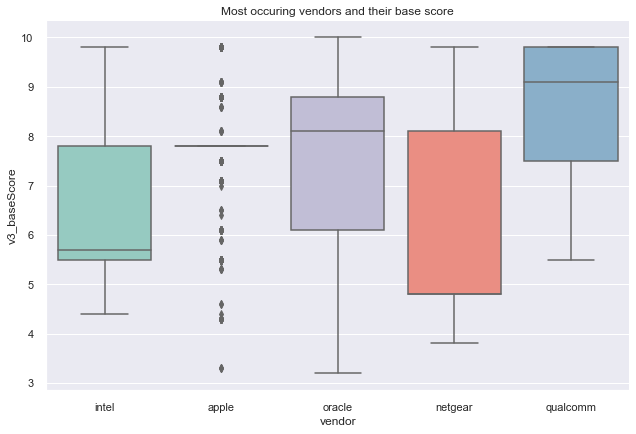

From the graph it can be seen that the vendors that have the most frequent vulnerabilites in their systems, most of them were of medium to high severity
Wall time: 219 ms


In [16]:
%%time
# YOUR CODE HERE
# # Boxplot Most frequent vendors and their base scores
data_vendor = {'vendor': data_df['vendor'],
               'v3_baseScore': data_df['v3_baseScore']}
df_vendor = pd.DataFrame(data_vendor)

# get top 5 most frequent values
top_5_vendors = df_vendor['vendor'].value_counts()[:5].index.tolist()
# ['qualcomm', 'intel', 'netgear', 'apple', 'oracle']

vendors = ['qualcomm', 'intel', 'netgear', 'apple', 'oracle']
# filtering dataframe so only the top 5 are present
res_df_vendor = df_vendor[df_vendor['vendor'].isin(vendors)]

# check for missing values
res_df_vendor.isnull().any()

# Plotting
sns.catplot(x='vendor', y='v3_baseScore', data=res_df_vendor, kind='box', palette="Set3", height=6, aspect=1.5)
plt.title("Most occuring vendors and their base score")
plt.show()
print("From the graph it can be seen that the vendors that have the most frequent vulnerabilites in their systems, most of them were of medium to high severity")

******
## Q4: Identifying Data Analysis Problems
### CVEs and real world issues

We mentioned that dataset is from 2020 and we have only given you the records that relate to the Software Development viewpoint. Do you remember any major software vulnerabilities that came to light in 2020? [This article](https://securityintelligence.com/posts/top-10-cybersecurity-vulnerabilities-2020/) claims that the top 2 vulnerabilities that were found in 2020 are;
- CVE-2020-8515: Draytek Vigor Command Injection
- CVE-2020-5722: HTTP: Grandstream UCM6200 SQL Injection

However, there may be various viewpoints. For e.g.: [this article](https://blog.detectify.com/2020/12/30/top-10-critical-cves-added-in-2020/) mentions another 10 CVE's. 

Your task is as follows:
#### (Q4.a)
- Find and present the vulnerabilities that are mentioned in the above two articles in the given dataset in a tabular format. You may not find all the 12 CVE's. What are possible reasons for this? (5 marks)
- Examine the properties of the CVEs that you found above. (At a minimum you should consider the data available in the './data/cvss_dataset.csv' file). Present a justification as to why some of the given CVEs may have been considered a _"large"_ bug? This should include references to the amount of damage a vulnerability caused, or could have potentially caused. (5 marks)

<span style= 'float: right;'><b>[10 marks]</b></span>

<br><br>
**Additional question for COMP6420 students: [worth extra 10 marks]**
#### (Q4.b)
- If you were given the task of identifying the top-10 most critical CVEs in the given data, how would you tackle the problem? Give a brief list of initial analysis you would perform. (7 marks)

- How would you go about implemention your proposed approach? (3 marks)

References are highly recommended for this question (both parts a and b) so that you can evidence your argument. **DO NOT** forget to list your references, including in your statement of originality document.  **Please note that failure to reference or improper referencing constitute a case for plagiarism which can have serious consequences for you.  So make sure you use references appropriately.  Please familiarise yourself with the university's [academic integrity rules here](https://www.anu.edu.au/students/academic-skills/academic-integrity) if you have not done so already**.

In [17]:
# YOUR CODE HERE
pd.set_option('display.max_columns', None)
# Check if the CVE mentioned in the articles are in the dataset
# leave out duplicates using set
cve_set = {'CVE-2020-12720',' CVE-2020-5902', 'CVE-2020-15506', 'CVE-2020-14882', 'CVE-2020-14750', 'CVE-2020-17530', 'CVE-2020-2551', 'CVE-2020-13379', 'CVE-2020-1147', 'CVE-2020-8209', 
            'CVE-2019-19871', 'CVE-2018-20062', 'CVE-2006-1547', 'CVE-2012-0391', 'CVE-2014-6271', 'CVE-2019-0708', 'CVE-2020-8515', 'CVE-2018-13382', 'CVE-2018-13379', 'CVE-2018-11776', 'CVE-2020-5722'}

# filtering the dataframe
res_df = data_df[data_df['cve_id'].isin(cve_set)]

print(f"Of the CVEs from the articles, only these were present in the dataset: \033[4m \033[1m{res_df['cve_id'].unique()}\033[0m \033[0m")
res_df


Of the CVEs from the articles, only these were present in the dataset:  ['CVE-2020-12720' 'CVE-2020-17530' 'CVE-2020-5722' 'CVE-2020-8515'] 


,cve_id,vendor,product_name,version,assigner,description,cwe_ids,refs,ref_names,ref_sources,ref_tags,v3_attackVector,v3_attackComplexity,v3_privilegesRequired,v3_userInteraction,v3_scope,v3_confidentialityImpact,v3_integrityImpact,v3_availabilityImpact,v3_exploitabilityScore,v3_impactScore,v3_baseScore,v3_baseSeverity,ISS
34352,CVE-2020-12720,vbulletin,vbulletin,"5.0.0:5.5.6,5.5.6,5.6.0,5.6.1.-",cve@mitre.org,"vBulletin before 5.5.6pl1, 5.6.0 before 5.6.0p...","CWE-89,CWE-306",https://forum.vbulletin.com/forum/vbulletin-an...,https://forum.vbulletin.com/forum/vbulletin-an...,"MISC,MISC,MISC,MISC","[['Vendor Advisory'], [], [], []]",0.85,0.77,0.85,0.85,0.0,0.56,0.56,0.56,3.887043,5.873119,9.8,5,0.914816
36874,CVE-2020-17530,apache,struts,2.0.0:*,security@apache.org,"Forced OGNL evaluation, when evaluated on raw ...",CWE-917,https://cwiki.apache.org/confluence/display/WW...,https://cwiki.apache.org/confluence/display/WW...,"CONFIRM,JVN,MISC,CONFIRM,MISC,MISC,N/A,MISC,MISC","[['Vendor Advisory'], ['Third Party Advisory']...",0.85,0.77,0.85,0.85,0.0,0.56,0.56,0.56,3.887043,5.873119,9.8,5,0.914816
36875,CVE-2020-17530,oracle,communications_policy_management,12.5.0,security@apache.org,"Forced OGNL evaluation, when evaluated on raw ...",CWE-917,https://cwiki.apache.org/confluence/display/WW...,https://cwiki.apache.org/confluence/display/WW...,"CONFIRM,JVN,MISC,CONFIRM,MISC,MISC,N/A,MISC,MISC","[['Vendor Advisory'], ['Third Party Advisory']...",0.85,0.77,0.85,0.85,0.0,0.56,0.56,0.56,3.887043,5.873119,9.8,5,0.914816
36876,CVE-2020-17530,oracle,communications_pricing_design_center,12.0.0.3.0,security@apache.org,"Forced OGNL evaluation, when evaluated on raw ...",CWE-917,https://cwiki.apache.org/confluence/display/WW...,https://cwiki.apache.org/confluence/display/WW...,"CONFIRM,JVN,MISC,CONFIRM,MISC,MISC,N/A,MISC,MISC","[['Vendor Advisory'], ['Third Party Advisory']...",0.85,0.77,0.85,0.85,0.0,0.56,0.56,0.56,3.887043,5.873119,9.8,5,0.914816
36877,CVE-2020-17530,oracle,financial_services_data_integration_hub,"8.0.3,8.0.6",security@apache.org,"Forced OGNL evaluation, when evaluated on raw ...",CWE-917,https://cwiki.apache.org/confluence/display/WW...,https://cwiki.apache.org/confluence/display/WW...,"CONFIRM,JVN,MISC,CONFIRM,MISC,MISC,N/A,MISC,MISC","[['Vendor Advisory'], ['Third Party Advisory']...",0.85,0.77,0.85,0.85,0.0,0.56,0.56,0.56,3.887043,5.873119,9.8,5,0.914816
36878,CVE-2020-17530,oracle,hospitality_opera_5,5.6,security@apache.org,"Forced OGNL evaluation, when evaluated on raw ...",CWE-917,https://cwiki.apache.org/confluence/display/WW...,https://cwiki.apache.org/confluence/display/WW...,"CONFIRM,JVN,MISC,CONFIRM,MISC,MISC,N/A,MISC,MISC","[['Vendor Advisory'], ['Third Party Advisory']...",0.85,0.77,0.85,0.85,0.0,0.56,0.56,0.56,3.887043,5.873119,9.8,5,0.914816
36879,CVE-2020-17530,oracle,mysql_enterprise_monitor,8.0.23,security@apache.org,"Forced OGNL evaluation, when evaluated on raw ...",CWE-917,https://cwiki.apache.org/confluence/display/WW...,https://cwiki.apache.org/confluence/display/WW...,"CONFIRM,JVN,MISC,CONFIRM,MISC,MISC,N/A,MISC,MISC","[['Vendor Advisory'], ['Third Party Advisory']...",0.85,0.77,0.85,0.85,0.0,0.56,0.56,0.56,3.887043,5.873119,9.8,5,0.914816
48214,CVE-2020-5722,grandstream,ucm6200_firmware,*:1.0.19.20,vulnreport@tenable.com,The HTTP interface of the Grandstream UCM6200 ...,CWE-89,https://www.tenable.com/security/research/tra-...,https://www.tenable.com/security/research/tra-...,"MISC,MISC,MISC","[['Exploit', 'Third Party Advisory'], ['Exploi...",0.85,0.77,0.85,0.85,0.0,0.56,0.56,0.56,3.887043,5.873119,9.8,5,0.914816
50585,CVE-2020-8515,draytek,vigor2960_firmware,1.3.1,cve@mitre.org,"DrayTek Vigor2960 1.3.1_Beta, Vigor3900 1.4.4_...",CWE-78,https://sku11army.blogspot.com/2020/01/draytek...,https://sku11army.blogspot.com/2020/01/draytek...,"MISC,MISC,MISC","[['Third Party Advisory'], ['Exploit', 'Vendor...",0.85,0.77,0.85,0.85,0.0,0.56,0.56,0.56,3.887043,5.873119,9.8,5,0.914816
50586,CVE-2020-8515,draytek,

******
## Q5: Data Analysis
In this section, you will be provided a question or statement that you are required to prove/disprove. For each question, you are to provide a statement outlining your answer, using evidence from the dataset as your justification. You are expected to draw upon not only your visualisation skills, but also your hypothesis testing skills where required. That means you expected to justify your answer based on both statistical and visual evidence.

Don't forget to state any assumptions you make in the questions in order to clarify your argument.

Use the following as a guide to assess the statements given below:
- How would you assess the given statement? 
- What kinds of statistical tests are appropriate to validate the statement? Justify your selection.
- How would you present the information related to the statement in a graphical manner?
- What is your answer to the statement? Why do you say so?

**Hint:** You are not expected to build Machine Learning models to answer this question. 

#### (Q5.a)
#### Statement: "The sum of the two sub scores (i.e. the Exploitability sub-score and the Impact sub-score) is a 'good' predictor for the Base Score."

After implementing the **CVSSv3.1** Base Score calculator in Question 2, you may recall that the Base Score is derived from two sub scores (i.e. the Exploitability sub-score and the Impact sub-score). For simplicity, let us explore whether we can get a 'good' estimate for the Base Score just by simply adding up the Exploitability sub-score and the Impact sub-score. 

[5 marks for code implementation, 5 marks for written response]
<span style= 'float: right;'><b>[10 marks]</b></span>

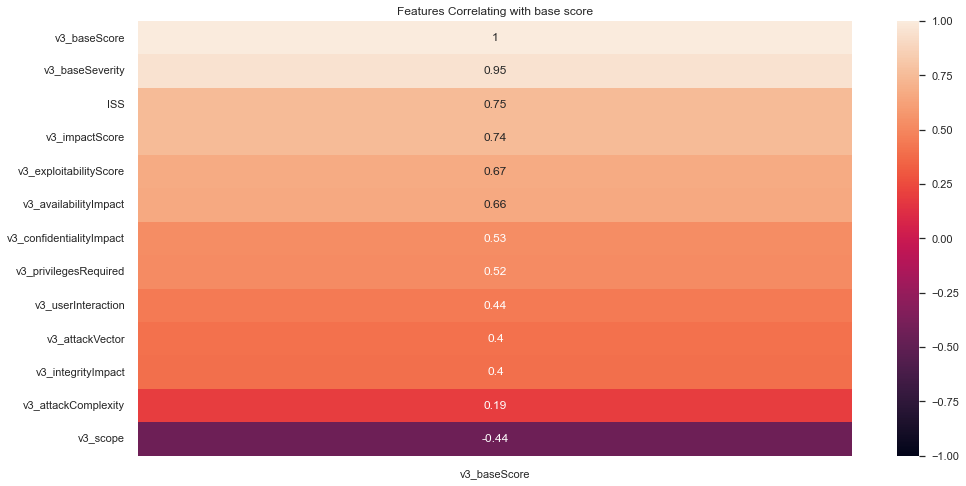

From the heatmap , it can be seen that base score has strong correlations with base severity(which is a given), ISS, impact score, explotability score and availability impact
Wall time: 237 ms


In [18]:
%%time
pd.reset_option('display.max_columns', None)
def plot_correlation_heatmap(data):
    '''
    plot correlation's matrix to explore dependency between features 
    '''
    # Looking for correlations in the data set
    corr_matrix = data_df.corr()
    # Generating a heatmap of the correlation matrix
    plt.figure(figsize=(16, 8))
    heatmap = sns.heatmap(data_df.corr()[['v3_baseScore']].sort_values(by='v3_baseScore', ascending=False), vmin=-1, vmax=1, annot=True);
    heatmap.set_title('Features Correlating with base score')
    plt.show()  
plot_correlation_heatmap(data_df)
print("From the heatmap , it can be seen that base score has strong correlations with base severity(which is a given), ISS, impact score, explotability score and availability impact")



Higher base severity number indicates higher severity rating
Wall time: 3.92 s


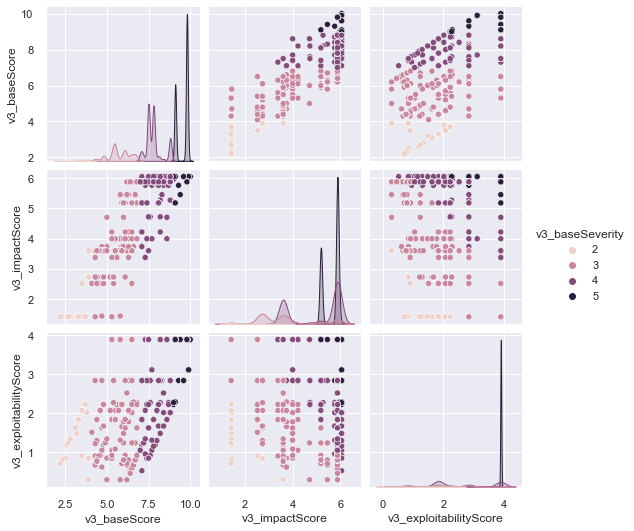

In [19]:
%%time
# To reduce wall time, I only took a sample of the dataframe (20000 rows out of ~50000) which still returned a similar graph
def plot_scatter_matrix(data):
    # plotting a scatter matrix of a few promising attributes
    attributes = ["v3_baseScore", "v3_impactScore", "v3_exploitabilityScore", "v3_baseSeverity"]
    rcParams['figure.figsize'] = 28, 6
    sns.pairplot(data_df[attributes].sample(20000), diag_kind='kde', hue='v3_baseSeverity')
plot_scatter_matrix(data_df)
print("Higher base severity number indicates higher severity rating")

It can be clearly seen that there is a sort of a upward trend and the points are not too dispersed.


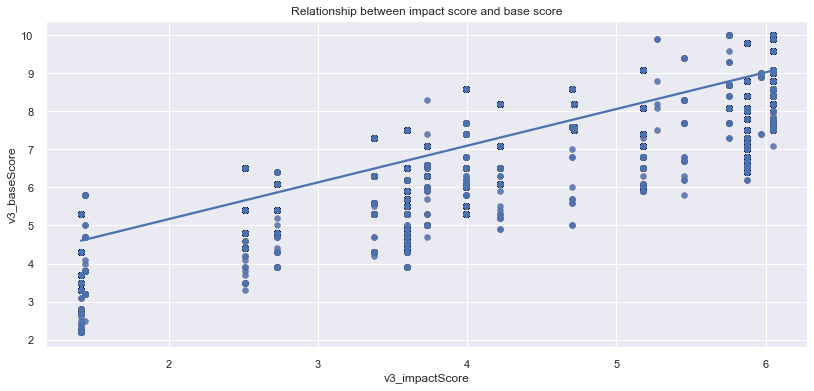

Wall time: 2.67 s


In [20]:
%%time
y = data_df['v3_baseScore']
x = data_df['v3_impactScore']

fig = plt.figure(figsize=(30,6))
ax2 = fig.add_subplot(122)
plt.scatter(x, y, alpha=0.2, edgecolors='black', c='purple')
sns.regplot(x=x, y=y)
plt.xlabel("v3_impactScore")
plt.ylabel('v3_baseScore')
plt.title("Relationship between impact score and base score")

print("It can be clearly seen that there is a sort of a upward trend and the points are not too dispersed.")
plt.show()

In [25]:
%%time
# Copy of original data
data_df_copy = data_df.copy()

# Select features
X1 = np.array(data_df_copy[['v3_exploitabilityScore', 'v3_impactScore']]) # Feature variables
y1 = np.array(data_df_copy['v3_baseScore'])                               # Target variables

# Instantiate Standard scaler
scaler = StandardScaler()
X1 = scaler.fit_transform(X1)

# Split the dataset
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, train_size=0.8, random_state=42)

# Instantiate Linear Regression
mlr = LinearRegression()

# Create a pipeline for multiple linear regression
pipe_mlr = Pipeline(steps=[('scaler',StandardScaler()),
                           ('mlr',LinearRegression())])

MLR_model = pipe_mlr.fit(X1_train, y1_train)

# Predict
y1_pred = np.around(MLR_model.predict(X1_test), 1)
print("Actual values:", y1_test[0:5])
print(f'MLR model predictions {y1_pred[0:5]}')
print("The predicted values using exploitability score and impact score are very similar to the actual values")
print(" ")

# check the test score and training score of your model
MLR_score = MLR_model.score(X1_test, y1_test)
print(f'R-squared (score) of multiple linear regression model is \033[4m \033[1m{MLR_score}\033[0m \033[0m, indicating very high correlation')

Actual values: [7.  9.8 9.8 9.8 7.5]
MLR model predictions [7.1 9.8 9.8 9.8 7.6]
The predicted values using exploitability score and impact score are very similar to the actual values
 
R-squared (score) of multiple linear regression model is  0.9932458806411035 , indicating very high correlation
Wall time: 24 ms


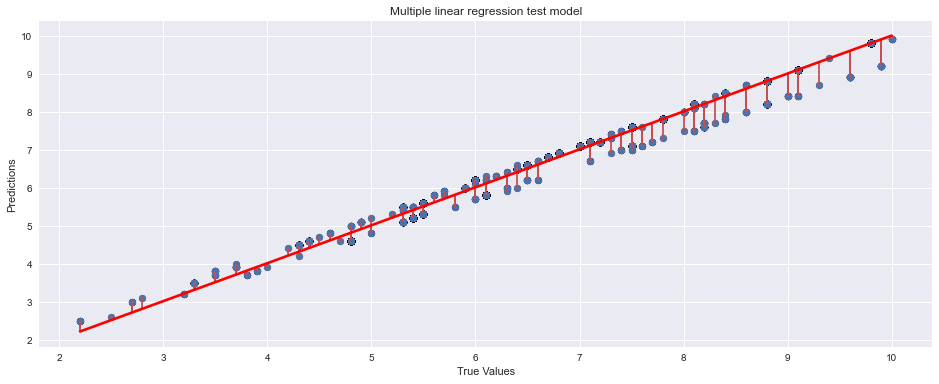

Wall time: 904 ms


In [26]:
%%time
fig = plt.figure(figsize=(16,6))
plt.scatter(y1_test, y1_pred, alpha=0.5, color = 'black')
plt.vlines(y1_test, y1_pred, color='r', ymax=y1_test)
plt.title("Multiple linear regression test model")
plt.xlabel("True Values")
plt.ylabel("Predictions")

# add the regression line 
# code from Lab04
sns.regplot(x=y1_test, y=y1_pred, line_kws={"color": "red"})

plt.show()

In [27]:
%%time
# Add up both exploitability and impact score columns and store in a new colume
# compare with base score column
data_df_copy = data_df.copy()
data_df_copy['exp+impact'] = data_df_copy.apply(lambda x: x['v3_impactScore'] + x['v3_exploitabilityScore'], axis=1).round(1)

# find the difference between exp+impact and base score columns to see how much the values differ by
data_df_copy['diff'] = data_df_copy.apply(lambda x: x['v3_baseScore'] - x['exp+impact'], axis=1)
# find the mean of diff
print(f"The mean of the differences between baseScore and exp+impact is: \033[4m \033[1m{data_df_copy['diff'].mean()}\033[0m \033[0m ")
data_df_copy

The mean of the differences between baseScore and exp+impact is:  0.0815490750649691  
Wall time: 974 ms


,cve_id,vendor,product_name,version,assigner,description,cwe_ids,refs,ref_names,ref_sources,...,v3_confidentialityImpact,v3_integrityImpact,v3_availabilityImpact,v3_exploitabilityScore,v3_impactScore,v3_baseScore,v3_baseSeverity,ISS,exp+impact,diff
0,CVE-2020-0002,google,android,"8.0,8.1,9.0,10.0",security@android.com,"In ih264d_init_decoder of ih264d_api.c, there ...","CWE-787,CWE-416",https://source.android.com/security/bulletin/2...,https://source.android.com/security/bulletin/2...,CONFIRM,...,0.56,0.56,0.56,2.835255,5.873119,8.8,4,0.914816,8.7,0.1
1,CVE-2020-0003,google,android,8.0,security@android.com,"In onCreate of InstallStart.java, there is a p...",CWE-367,https://source.android.com/security/bulletin/2...,https://source.android.com/security/bulletin/2...,CONFIRM,...,0.56,0.56,0.56,0.764664,5.873119,6.7,3,0.914816,6.6,0.1
2,CVE-2020-0005,google,android,"8.0,8.1,9.0,10.0",security@android.com,In btm_read_remote_ext_features_complete of bt...,CWE-787,https://source.android.com/security/bulletin/2...,https://source.android.com/security/bulletin/2...,MISC,...,0.56,0.56,0.56,0.798929,5.873119,6.7,3,0.914816,6.7,0.0
3,CVE-2020-0006,google,android,"8.0,8.1,9.0,10.0",security@android.com,In rw_i93_send_cmd_write_single_block of rw_i9...,CWE-908,https://source.android.com/security/bulletin/2...,https://source.android.com/security/bulletin/2...,CONFIRM,...,0.56,0.00,0.00,2.835255,3.595200,6.5,3,0.560000,6.4,0.1
4,CVE-2020-0007,google,android,"8.0,8.1,9.0,10.0",security@android.com,"In flattenString8 of Sensor.cpp, there is a po...",CWE-908,https://source.android.com/security/bulletin/2...,https://source.android.com/security/bulletin/2...,CONFIRM,...,0.56,0.00,0.00,1.834577,3.595200,5.5,3,0.560000,5.4,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52323,CVE-2020-9999,apple,iphone_os,*:14.0,product-security@apple.com,A memory corruption issue was addressed with i...,CWE-787,"https://support.apple.com/en-us/HT211931,https...","https://support.apple.com/en-us/HT211931,https...","MISC,MISC,FULLDISC,CONFIRM,CONFIRM,CONFIRM,CON...",...,0.56,0.56,0.56,1.834577,5.873119,7.8,4,0.914816,7.7,0.1
52324,CVE-2020-9999,apple,itunes,*:12.10.9,product-security@apple.com,A memory corruption issue was addressed with i...,CWE-787,"https://support.apple.com/en-us/HT211931,https...","https://support.apple.com/en-us/HT211931,https...","MISC,MISC,FULLDISC,CONFIRM,CONFIRM,CONFIRM,CON...",...,0.56,0.56,0.56,1.834577,5.873119,7.8,4,0.914816,7.7,0.1
52325,CVE-2020-9999,apple,mac_os_x,*:11.0.1,product-security@apple.com,A memory corruption issue was addressed with i...,CWE-787,"https://support.apple.com/en-us/HT211931,https...","https://support.apple.com/en-us/HT211931,https...","MISC,MISC,FULLDISC,CONFIRM,CONFIRM,CONFIRM,CON...",...,0.56,0.56,0.56,1.834577,5.873119,7.8,4,0.914816,7.7,0.1
52326,CVE-2020-9999,apple,tvos,*:14.0,product-security@apple.com,A memory corruption issue was addressed with i...,CWE-787,"https://support.apple.com/en-us/HT211931,https...","https://support.apple.com/en-us/HT211931,https...","MISC,MISC,FULLDISC,CONFIRM,CONFIRM,CONFIRM,CON...",...,0.56,0.56,0.56,1.834577,5.873119,7.8,4,0.914816,7.7,0.1


In [28]:
hypothesis = np.array(data_df_copy['exp+impact'])
actual = np.array(data_df_copy['v3_baseScore'])

hypothesis_mean = np.mean(data_df_copy['exp+impact'])
actual_mean = np.mean(data_df_copy['v3_baseScore'])
print(f'hypothesis mean: {hypothesis_mean}')
print(f'actual mean: {actual_mean}')

hypothesis_std = np.std(data_df_copy['exp+impact'])
actual_std = np.std(data_df_copy['v3_baseScore'])
print(f'hypothesis standard deviation: {hypothesis_std}')
print(f'actual standard deviation: {actual_std}')

# Call hypothesis function
t, p = stats.ttest_ind(hypothesis, actual)
print("p-value:", p)

if p < 0.05:
    print("we reject null hypothesis")
else:
    print("we fail to reject null hypothesis")

hypothesis mean: 7.961668705091694
actual mean: 8.043217780152531
hypothesis standard deviation: 1.6104124567977123
actual standard deviation: 1.5347798193840783
p-value: 5.1167285277682746e-17
we reject null hypothesis


#### (Q5.b):

#### Statement: "The entries which require both LOW/None privileges AND LOW attack complexity have a higer CVSS Base Score."

In this question we are looking at the relationship beetween some of the categorial data that is present in our dataset and our response variable. 

[5 marks for code implementation, 5 marks for written response]        
<span style= 'float: right;'><b>[10 marks]</b></span>

The original mean base score is 8.043217780152531, compared to the low/none privileges and low attack complexity mean base score 8.280481938150535,
which shows that there isn't a significant difference.
As seen in the histogram, both datasets have equal number of high base scores
Wall time: 431 ms


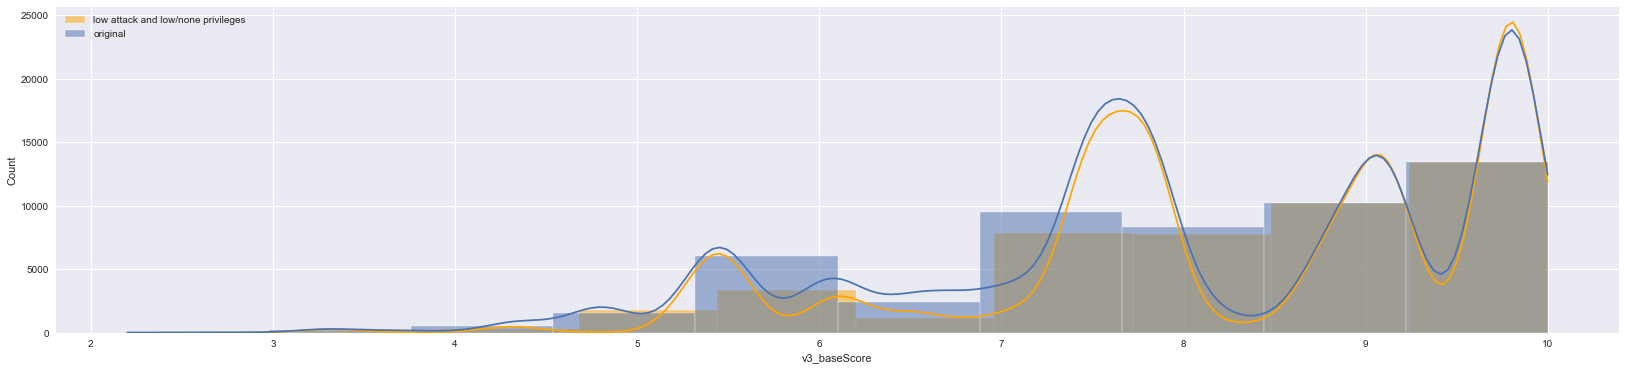

In [31]:
%%time
# filtering the dataframe
privs = [0.85, 0.62, 0.68]
attackComp = [0.77]
result_df = data_df[data_df['v3_privilegesRequired'].isin(privs)]
result_df2 = result_df[result_df['v3_attackComplexity'].isin(attackComp)]
pd.set_option('display.max_columns', None)
# Find the mean base score on these conditions
mean_baseScore = result_df2['v3_baseScore'].mean()

# Compare with the mean base score of original data
original_mean_baseScore = data_df['v3_baseScore'].mean()

print(f'The original mean base score is {original_mean_baseScore}, compared to the low/none privileges and low attack complexity mean base score {mean_baseScore},')
print("which shows that there isn't a significant difference.")

# Plot some distribution graphs
rcParams['figure.figsize'] = 28, 6
sns.histplot(data=result_df2, x='v3_baseScore', bins=10, kde=True, color='orange', label='low attack and low/none privileges')

# Original
sns.histplot(data=data_df, x='v3_baseScore', bins=10, kde=True, label='original')
plt.legend()

print("As seen in the histogram, both datasets have equal number of high base scores")

In [32]:
hypothesis = np.array(result_df2['v3_baseScore'])
actual = np.array(data_df['v3_baseScore'])

hypothesis_mean = np.mean(result_df2['v3_baseScore'])
actual_mean = np.mean(data_df['v3_baseScore'])
print(f'hypothesis mean: {hypothesis_mean}')
print(f'actual mean: {actual_mean}')

hypothesis_std = np.std(result_df2['v3_baseScore'])
actual_std = np.std(data_df['v3_baseScore'])
print(f'hypothesis standard deviation: {hypothesis_std}')
print(f'actual standard deviation: {actual_std}')

# Call hypothesis function
t, p = stats.ttest_ind(hypothesis, actual)
print("p-value:", p)

if p < 0.05:
    print("we reject null hypothesis")
else:
    print("we fail to reject null hypothesis")

hypothesis mean: 8.280481938150535
actual mean: 8.043217780152531
hypothesis standard deviation: 1.4196503338799908
actual standard deviation: 1.5347798193840783
p-value: 2.804541061255164e-138
we reject null hypothesis


******
## Q6: Classification

Now you are asked to build a classification model to predict the Threat level (Base Severity) of a vulnerability. 

Your task is as follows:
#### (Q6.a): Train a classification model to predict Threat level (Base Severity). You are able to choose any variables in the dataset, except of course the Base Scores, Sub Scores and Base Severity. (10 marks)
#### (Q6.b): Why did you implement this particular model? What are the advantages and limitations of this type of model? (2 marks)
#### (Q6.c): What are your considerations in implementing the training/testing split? Why did you make this choice? (2 marks)
#### (Q6.d): Briefly explain your training considerations (including iterations, hyper-parameters and variable selection). (2 marks)
#### (Q6.e):  How did you perform testing and validation? Which metrics were used in the validation? (2 marks)
#### (Q6.f): After running your experiment, provide a written answer highlighting your results and the outcome of your work. (2 marks)

<span style= 'float: right;'><b>[20 marks]</b></span>

### Logistic Regression: ###

In [33]:
%%time
# YOUR CODE HERE
# Creating a copy of the original to preserve the original data
data_df_copy = data_df.copy()

# Scaling the data
scaler = StandardScaler()

# Features to use:
# ['v3_attackVector', 'v3_attackComplexity', 'v3_privilegesRequired', 
#  'v3_userInteraction', 'v3_scope', 'v3_confidentialityImpact', 'v3_integrityImpact','v3_availabilityImpact']

# columns to scale
cols = ['v3_attackVector', 'v3_attackComplexity',
        'v3_privilegesRequired', 'v3_userInteraction', 'v3_scope',
        'v3_confidentialityImpact', 'v3_integrityImpact','v3_availabilityImpact']
data_df_copy[cols] = scaler.fit_transform(data_df_copy[cols])

data_df_copy = data_df_copy.drop(['cve_id', 'version', 'assigner',
       'description', 'cwe_ids', 'refs', 'ref_names', 'ref_sources',
       'ref_tags', 'v3_exploitabilityScore', 'v3_impactScore',
       'v3_baseScore', 'ISS', 'vendor', 'product_name'], axis=1)

# Selecting the features
# X will be every column except last (severity)
X = data_df_copy.iloc[:, :-1].values  # feature variables
y = data_df_copy.iloc[:, -1].values   # target variables

# Check if properly scaled
print("The mean of X is:", X.mean())
print("The standard deviation of X is:", X.std())

The mean of X is: 7.50626861963353e-16
The standard deviation of X is: 1.0
Wall time: 22 ms


In [34]:
%%time
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

#(Balancing) check whether the data set is balanced or not
# i.e the output classes in the training set are equally represented. 
# value_counts() func can be used to calc the number of records
# in each output class
print (X_train.shape,",", y_train.shape)
print (X_test.shape,",", y_test.shape)

def check_set_balance():
    if X_train.shape[0] == y_train.shape[0] and X_test.shape[0] == y_test.shape[0]:
        print("the training sets and testing sets are balanced")
    else :
        print("the sets are not balanced")
check_set_balance()

(41862, 8) , (41862,)
(10466, 8) , (10466,)
the training sets and testing sets are balanced
Wall time: 6 ms


In [35]:
%%time
import warnings
warnings.filterwarnings("ignore") 
# Using SKlearn's GridSearchCV for hyperparameter tuning

# First I will try Logistic Regression and see it's performance
# Instantiate the model
logreg = LogisticRegression()

# Logistic Regression requires two parameters 'C' and 'penalty' to be optimised by GridSearchCV [Ref: 1]
C = np.logspace(-4, 4, 50)
# all solvers use either none or l2. some don't use l1.
penalty = ['none', 'l2']
# sag and saga are better for larger datasets and handles multiclass problems
solver = ['sag', 'saga']

# Create a dict of hyperparameters
hyperparameters = dict(logreg__C=C,
                       logreg__penalty=penalty,
                       logreg__solver=solver)

# Creating a pipeline for better work flow
pipe = Pipeline(steps=[('scaler',StandardScaler()),
                       ('logreg',logreg)]) 

# Instantiate GridSearchCV and pass in the parameters and cross_validation of 5 folds
# halvingGridSearch = HalvingGridSearchCV(pipe, hyperparameters, n_jobs=-1, min_resources="exhaust", factor=3, random_state=42, cv=5)

# Fitting the data
# logreg_model = halvingGridSearch.fit(X_train, y_train)
# print("The best parameters are:", logreg_model.best_params_)

The best parameters are: {'logreg__C': 5.428675439323859, 'logreg__penalty': 'none', 'logreg__solver': 'sag'}
Wall time: 12.3 s


In [36]:
%%time
warnings.filterwarnings("default") 
# Fit best model from grid search
# Make an instance of Logistic Regression using the best parameters
# setting penalty to none gave warnings and ignored C so ls was chosen (the default)
logreg = LogisticRegression(C=1.7575106248547894, penalty='l2', max_iter=1000, solver='sag')

# Fit logistic regression
logreg_model = logreg.fit(X_train, y_train)

# Model evaluations
train_score = logreg_model.score(X_train,y_train)
test_score = logreg_model.score(X_test,y_test)

print(f"Training set score:\033[4m \033[1m{train_score}\033[0m \033[0m")
print(f"Test set score:\033[4m \033[1m{test_score}\033[0m \033[0m")
print("----------------------------------------------------------------")

coeff = logreg_model.coef_[0]
columns = np.array(['v3_attackVector', 'v3_attackComplexity', 'v3_privilegesRequired', 
                    'v3_userInteraction', 'v3_scope', 'v3_confidentialityImpact', 
                    'v3_integrityImpact','v3_availabilityImpact'])
coefficent = {x:coef for x, coef in zip(columns, coeff)}

print("Intercept :", logreg_model.intercept_)
print("Attributes' Coefficients: ", coefficent)

Training set score: 0.9900625865940471 
Test set score: 0.9897764188801834 
----------------------------------------------------------------
Intercept : [-27.71679042   4.27197515  16.87877487   6.5660404 ]
Attributes' Coefficients:  {'v3_attackVector': -7.904967443198768, 'v3_attackComplexity': -2.574528057885805, 'v3_privilegesRequired': -5.800488396675958, 'v3_userInteraction': -3.2567510630010226, 'v3_scope': -1.8169962950331633, 'v3_confidentialityImpact': -9.164046799078832, 'v3_integrityImpact': -9.258693516847424, 'v3_availabilityImpact': -8.242846867237752}
Wall time: 862 ms


In [37]:
%%time
y_pred = logreg_model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average='micro'))
print("Recall:",metrics.recall_score(y_test, y_pred, average='micro'))
print('----------------------------------------------------------------------')
print('Classification report')
print('----------------------------------------------------------------------')
print(classification_report(y_test, y_pred))
print('----------------------------------------------------------------------')
print("The RMSE of the model is:", sqrt(mean_squared_error(y_test, y_pred)), "indicating the logistic regression model fit the data pretty well")

Accuracy: 0.9897764188801834
Precision: 0.9897764188801834
Recall: 0.9897764188801834
----------------------------------------------------------------------
Classification report
----------------------------------------------------------------------
              precision    recall  f1-score   support

           2       0.98      0.89      0.94        66
           3       0.98      0.98      0.98      2152
           4       0.99      0.99      0.99      4163
           5       1.00      1.00      1.00      4085

    accuracy                           0.99     10466
   macro avg       0.99      0.97      0.98     10466
weighted avg       0.99      0.99      0.99     10466

----------------------------------------------------------------------
The RMSE of the model is: 0.10111172592640554 indicating the logistic regression model fit the data pretty well
Wall time: 20.1 ms


In [38]:
# Confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
print("CONFUSION MATRIX:")
print(cm)
print("From the number of true positives in the confusion matrix it can seen that the Logistic regression model was correctly able to classify majority of the classes.")

CONFUSION MATRIX:
[[  59    7    0    0]
 [   1 2117   34    0]
 [   0   47 4111    5]
 [   0    0   13 4072]]
From the number of true positives in the confusion matrix it can seen that the Logistic regression model was correctly able to classify majority of the classes.


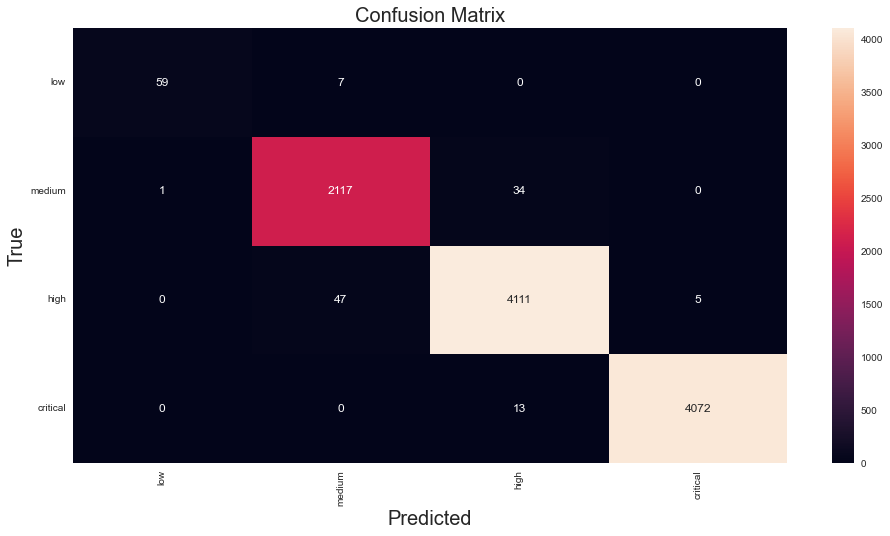

Wall time: 146 ms


In [39]:
%%time
## Get Labels
class_names = ['low','medium','high','critical']
# Plot confusion matrix in a beautiful manner
plt.rcParams['axes.grid'] = False 
fig = plt.figure(figsize=(16, 8))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); 
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(class_names, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(class_names, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Confusion Matrix', fontsize=20)

plt.show()

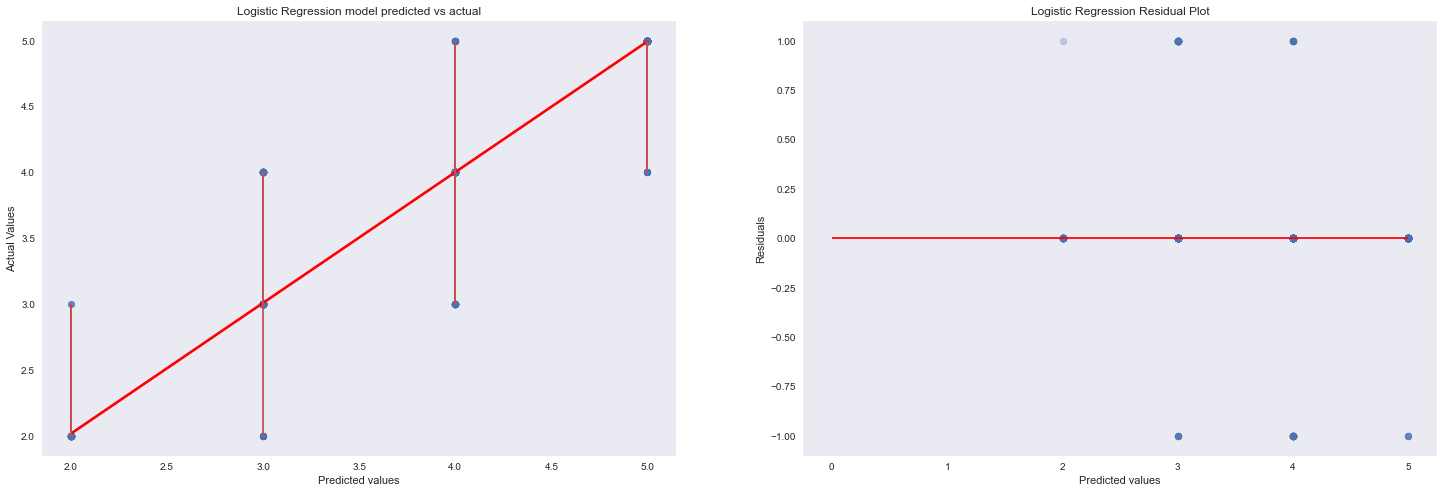

From the residual plot, it can be seen that for most high base scores some dots in the positive region are far from the line indicating the model's predictions were too low.
Most dots (primarily in the negative region) are close to the lines.
Wall time: 1.03 s


In [45]:
%%time
# Residual Analysis
# Error = Actualy y values - predicted y values
fig = plt.figure(figsize=(25, 8))
ax1 = fig.add_subplot(121)
plt.scatter(y_pred, y_test, alpha=0.3)
sns.regplot(x=y_pred, y=y_test, line_kws={"color": "red"})
plt.vlines(y_test, y_pred, color='r', ymax=y_test)
plt.ylabel("Actual Values")
plt.xlabel("Predicted values")
plt.title("Logistic Regression model predicted vs actual")

ax2 = fig.add_subplot(122)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.3)
plt.hlines(y=0, xmin=0, xmax=max(y_pred), color='red')
plt.ylabel("Residuals")
plt.xlabel("Predicted values")
plt.title("Logistic Regression Residual Plot")

plt.show()
print("From the residual plot, it can be seen that for most high base scores some dots in the positive region are far from the line indicating the model's predictions were too low.")
print("Most dots (primarily in the negative region) are close to the lines.")


In [63]:
print(np.isnan(y_test).any())
print(np.isnan(y_pred).any())

False
False


### K-Neighbors Classifier: ###

In [64]:
%%time
# Creating new copy and starting fresh
data_df_copy = data_df.copy()
data_df_copy2 = data_df.copy()

# Scaling the data
scaler = StandardScaler()

# Features to use:
# ['v3_attackVector', 'v3_attackComplexity', 'v3_privilegesRequired', 
#  'v3_userInteraction', 'v3_scope', 'v3_confidentialityImpact', 'v3_integrityImpact','v3_availabilityImpact']

# columns to scale
cols = ['v3_attackVector', 'v3_attackComplexity',
        'v3_privilegesRequired', 'v3_userInteraction', 'v3_scope',
        'v3_confidentialityImpact', 'v3_integrityImpact','v3_availabilityImpact']
data_df_copy[cols] = scaler.fit_transform(data_df_copy[cols])

data_df_copy = data_df_copy.drop(['cve_id', 'version', 'assigner',
       'description', 'cwe_ids', 'refs', 'ref_names', 'ref_sources',
       'ref_tags', 'v3_exploitabilityScore', 'v3_impactScore',
       'v3_baseScore', 'ISS', 'vendor', 'product_name'], axis=1)

# Selecting the features
# X will be every column except last (severity)
X = data_df_copy.iloc[:, :-1].values  # feature variables
y = data_df_copy.iloc[:, -1].values   # target variables

Wall time: 28 ms


In [47]:
%%time
# Using SKlearn's GridSearchCV for hyperparameter tuning
# Instantiate the model
knn = KNeighborsClassifier()

# Hyperparameters to tune
hyperparameters = {'n_neighbors': np.arange(1,10),
                  'weights': ['uniform', 'distance'],
                  'metric': ['euclidean', 'manhattan']}

# Instantiate GridSearchCV and pass in the parameters and cross_validation of 5 folds
# halvingGridSearch = HalvingGridSearchCV(knn, hyperparameters, n_jobs=-1, min_resources="exhaust", factor=3, random_state=42, cv=5)

# Fitting the data
# knn_model = halvingGridSearch.fit(X_train, y_train)
# print("The best parameters are:", knn_model.best_params_)

The best parameters are: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Wall time: 20.8 s


In [48]:
%%time
# Splitting the data
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, train_size=0.8, random_state=42)

# fit and score the model 
knn = KNeighborsClassifier(n_neighbors=5, metric='manhattan', weights='distance')
knn_model = knn.fit(X2_train, y2_train)
# Predict
y2_pred = knn_model.predict(X2_test)

print("Training Score:", knn_model.score(X2_train, y2_train))
print("Test score: ", knn_model.score(X2_test, y2_test))
# print results
print('----------------------------------------------------------------------')
print('Classification report')
print('----------------------------------------------------------------------')
print(classification_report(y2_test, y2_pred))
print('----------------------------------------------------------------------')
print('The KNN model was able to precisely classify 3 (Medium), 4 (High) and 5 (Critical)')
print('----------------------------------------------------------------------')
print("The RMSE of the model is:", sqrt(mean_squared_error(y2_test, y2_pred)), "indicating the KNN model fit the data very well, better than Logistic Regression")

Training Score: 1.0
Test score:  0.9994267150773934
----------------------------------------------------------------------
Classification report
----------------------------------------------------------------------
              precision    recall  f1-score   support

           2       0.98      0.97      0.98        66
           3       1.00      1.00      1.00      2152
           4       1.00      1.00      1.00      4163
           5       1.00      1.00      1.00      4085

    accuracy                           1.00     10466
   macro avg       1.00      0.99      0.99     10466
weighted avg       1.00      1.00      1.00     10466

----------------------------------------------------------------------
The KNN model was able to precisely classify 3 (Medium), 4 (High) and 5 (Critical)
----------------------------------------------------------------------
The RMSE of the model is: 0.02394336907384872 indicating the KNN model fit the data very well, better than Logistic Regressi

In [49]:
%%time
# Confusion matrix
cm = metrics.confusion_matrix(y2_test, y2_pred)
print("CONFUSION MATRIX:")
print(cm)
print("From the number of true positives in the confusion matrix it can seen that the KNN model was correctly able to classify majority of the classes. Better than Logistic regression.")

CONFUSION MATRIX:
[[  64    2    0    0]
 [   1 2149    2    0]
 [   0    0 4162    1]
 [   0    0    0 4085]]
From the number of true positives in the confusion matrix it can seen that the KNN model was correctly able to classify majority of the classes. Better than Logistic regression.
Wall time: 6.97 ms


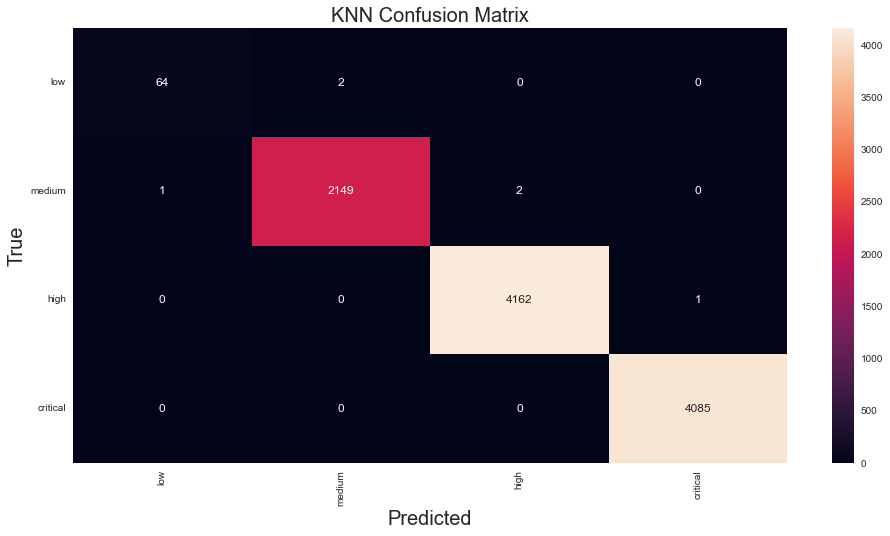

Wall time: 151 ms


In [50]:
%%time
## Get Labels
class_names = ['low','medium','high','critical']
# Plot confusion matrix in a beautiful manner
plt.rcParams['axes.grid'] = False 
fig = plt.figure(figsize=(16, 8))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); 
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(class_names, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(class_names, fontsize = 10)
plt.yticks(rotation=0)

plt.title('KNN Confusion Matrix', fontsize=20)

plt.show()

In [51]:
%%time
# Cross validating
knn = KNeighborsClassifier(n_neighbors=5, metric='manhattan', weights='distance')
knn.fit(X2_train, y2_train)
# Predict
y2_pred = knn.predict(X2_test)
print("KNN model score:", metrics.accuracy_score(y2_test, y2_pred))

# cross-validation score
# K fold is configured to 10 from the imports cells
score = cross_val_score(knn, X2_train, y2_train, cv=k_fold, n_jobs=1, scoring='accuracy')
print("Cross validated score:", score.mean())

KNN model score: 0.9994267150773934
Cross validated score: 0.9991400474998777
Wall time: 9.15 s


******
## Q7: Apply your knowledge to the problem domain

The government is worried about security issues that target user involvement over the internet.  You have been asked to help identify relevant vulnerabilities that need to be prioritised for patching.  While the CVSS systems provide a good general system for determining the Threat Level (Severity) of a vulnerability, you are only concerned with weaknesses that can be exploited over a network, and require user interaction.

Your task is as follows:    
#### (Q7.a)
- Develop and present a basic heuristic to classify the Threat Level to identify which products need patching relevant to the above given context. A heuristic is a simple set of rules or a rule of thumb (e.g. 'If the fire alarm is activated, then leave the building' or 'If there are grey clouds, bring the washing in as it might rain' ). (2 marks)
<br>(Similar to the Q6 above, you are able to choose any variables in the dataset, except of course the Base Scores, Sub Scores and Base Severity)
- Run your heuristic over the dataset, and add the output to each row on the dataset, under a new column named `Threat Classification`.  (5 marks)
- Justify your use of variables and the reasoning behind your heuristic in the written section below and explain how this might be an effective solution to stopping attacks. (3 marks)

<span style= 'float: right;'><b>[10 marks]</b></span>

<br><br>
**Additional question for COMP6420 students: [worth extra 10 marks]**
#### (Q7.b)
 - Compare your heuristic result with the actual result (threat level) (5 marks)
 - Based on your result, how would you improve your heuristic? (no implementation is required) (5 marks)


In [52]:
# YOUR CODE HERE
pd.set_option('display.max_column', None)
# attack vector = network = 0.85
# user interaction = required = 0.62
# Create a subset of the original dataframe with only the above mentioned values
data_df_copy_heuristic = data_df.copy()
data_df_copy_heuristic = data_df_copy_heuristic[data_df_copy_heuristic['v3_attackVector'].isin([0.85])]
data_df_copy_heuristic = data_df_copy_heuristic[data_df_copy_heuristic['v3_userInteraction'].isin([0.62])]

# Drop base scores, sub scores and base severity
data_df_copy_heuristic.drop(['v3_exploitabilityScore', 'v3_impactScore', 'v3_baseScore', 
                   'ISS', 'assigner', 'description', 'refs',
                   'ref_names', 'ref_sources', 'ref_tags'], axis=1, inplace=True)
data_df_copy_heuristic

,cve_id,vendor,product_name,version,cwe_ids,v3_attackVector,v3_attackComplexity,v3_privilegesRequired,v3_userInteraction,v3_scope,v3_confidentialityImpact,v3_integrityImpact,v3_availabilityImpact,v3_baseSeverity
0,CVE-2020-0002,google,android,"8.0,8.1,9.0,10.0","CWE-787,CWE-416",0.85,0.77,0.85,0.62,0.0,0.56,0.56,0.56,4
3,CVE-2020-0006,google,android,"8.0,8.1,9.0,10.0",CWE-908,0.85,0.77,0.85,0.62,0.0,0.56,0.00,0.00,3
19,CVE-2020-0032,google,android,"8.0,8.1,9.0,10.0",CWE-787,0.85,0.77,0.85,0.62,0.0,0.56,0.56,0.56,4
33,CVE-2020-0049,google,android,10.0,CWE-908,0.85,0.77,0.85,0.62,0.0,0.56,0.00,0.00,3
211,CVE-2020-0119,google,android,10.0,CWE-295,0.85,0.44,0.85,0.62,0.0,0.56,0.00,0.00,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52316,CVE-2020-9993,apple,ipad_os,*:14.0,CWE-1021,0.85,0.77,0.85,0.62,0.0,0.00,0.22,0.00,3
52317,CVE-2020-9993,apple,iphone_os,*:14.0,CWE-1021,0.85,0.77,0.85,0.62,0.0,0.00,0.22,0.00,3
52318,CVE-2020-9993,apple,safari,14.0,CWE-1021,0.85,0.77,0.85,0.62,0.0,0.00,0.22,0.00,3
52319,CVE-2020-9993,apple,watchos,*:7.0,CWE-1021,0.85,0.77,0.85,0.62,0.0,0.00,0.22,0.00,3


In [53]:
def heuristic_formula(av, ac, pr, ui, s, ci, ii, ai):
    '''
    A simple function to calculates a threat classification using a simple set of rules
    input: attackVector, attackComplexity, privilegesRequired,
           userInteraction, scope, confidentialityImpact,
           integrityImpact, availabilityImpact
    output: threat classification rating
    '''
    if s == 1:
        res = av + ac + (pr * 6) + ui + (ci + ii + ai)
    else:
        res = av + ac + (pr * 5) + ui + (ci + ii + ai)
    return res

# Create threat classification column using heuristic formula
data_df_copy_heuristic['Threat_score'] = np.vectorize(heuristic_formula)(data_df_copy_heuristic['v3_attackVector'],
                                                              data_df_copy_heuristic['v3_attackComplexity'],
                                                              data_df_copy_heuristic['v3_privilegesRequired'],
                                                              data_df_copy_heuristic['v3_userInteraction'],
                                                              data_df_copy_heuristic['v3_scope'],
                                                              data_df_copy_heuristic['v3_confidentialityImpact'],
                                                              data_df_copy_heuristic['v3_integrityImpact'],
                                                              data_df_copy_heuristic['v3_availabilityImpact'])

def Threat_classification(Threat_score):
    '''
    This function assigns a severity rating depending on the base score
    input: float
    output: string
    '''
    if 0.0 <= Threat_score <= 3.9:
        return 2
    elif 4.0 <= Threat_score <= 6.9:
        return 3
    elif 7.0 <= Threat_score <= 8.9:
        return 4
    elif 9.0 <= Threat_score <= 10.0:
        return 5
    
data_df_copy_heuristic['Threat classificaiton'] = data_df_copy_heuristic.apply(lambda row: Threat_classification(row['Threat_score']), axis=1)

In [54]:
# Comparing threat classification from heuristic to actual base severity
data_df_copy_heuristic['similarities'] = np.where(data_df_copy_heuristic['Threat classificaiton']==data_df_copy_heuristic['v3_baseSeverity'], data_df_copy_heuristic['Threat classificaiton'], np.nan)
print(data_df_copy_heuristic['similarities'].value_counts(),'\n')
print("The number of severity ratings corrrectly calculated by heuristic: \n0 low severity out of 10, \n2432 medium severity out of 4294, \n1472 high severity out of 1513, \n50 critical severity out of 77.")
print("\nThe heuristic implemented isn't quite accurate and has much room for improvement")

3.0    2432
4.0    1472
5.0      50
Name: similarities, dtype: int64 

The number of severity ratings corrrectly calculated by heuristic: 
0 low severity out of 10, 
2432 medium severity out of 4294, 
1472 high severity out of 1513, 
50 critical severity out of 77.

The heuristic implemented isn't quite accurate and has much room for improvement


In [55]:
pd.reset_option('display.max_column', None)
# Find products that need patching
data_df_copy_sub = data_df_copy_heuristic[['vendor', 'product_name', 'version', 'Threat classificaiton']]
data_df_copy_sub_sorted = data_df_copy_sub.sort_values(['Threat classificaiton'], ascending = False)
data_df_copy_sub_sorted.head(10)

,vendor,product_name,version,Threat classificaiton
38667,mitel,micloud_management_portal,"*:*,6.1",5.0
48541,f5,big-ip_local_traffic_manager,"13.1.0:13.1.3.5,14.1.0:14.1.2.8,15.0.0:15.1.1,...",5.0
38108,zibbs_project,zibbs,1.0,5.0
38111,php-fusion,phpfusion,9.03.50,5.0
39551,linuxfoundation,dex,*:2.27.0,5.0
48542,f5,big-ip_policy_enforcement_manager,"13.1.0:13.1.3.5,14.1.0:14.1.2.8,15.0.0:15.1.1,...",5.0
48427,f5,nginx_controller,3.3.0:*,5.0
40455,mydbr,mydbr,5.8.3\/4262,5.0
37558,wdja,wdja_cms,1.5.1,5.0
48885,google,chrome,*:83.0.4103.61,5.0
